# Testing Least Squares Class

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from LeastSquares import LeastSquares
%matplotlib notebook 

## Declaring variables

Averages of the intensities for the 9 different areas in the sky.

In [2]:
avg_data = pd.read_csv('Data/avg_intensities.txt',sep = "\s+", names = ['Frequency (GHz)','Intensity'],skiprows = [0,1])
freq = avg_data['Frequency (GHz)'].iloc[:30] #first 30 freq values (same freq values for all spectra)
freq_arr = freq[np.arange(freq.size)].values.reshape((freq.size,1)) #array of frequency reshaped
freq_add = np.linspace(0.01,0.05, 10,endpoint=False).reshape(10,1) #additional freq values to extend curve
freq_arr = np.vstack([freq_add,freq_arr]) #combining freq_add and freq_arr 
intensity_arr = avg_data['Intensity'].values.reshape((9,30)) #2d array of intensity values (9x30)

In [3]:
freq2= np.array([0.01, 0.022, 0.045, 0.408, 1.42,2.326]) #6 freq
freq2_arr = freq2.reshape((freq2.size,1))
load_data = np.load('Data/all_data.npz')
load_data_noisy = np.load('Data/noisy_data_new.npz')
load_data_blurnois = np.load('Data/blurry_noisy_data_2.npz')
intensity_arr2 = load_data['arr_0'] #intensity array for overlapping pixels
intensity_noisy = load_data['arr_0'] #intensity array for noisy data
int_blurnois = load_data['arr_0'] #intensity array for blurred noisy data

In [4]:
ls = LeastSquares(freq_arr) #creating object of LeastSquares class
lin_matrix = ls.lin_matrix() #data matrix for linear model
quad_matrix = ls.quad_matrix() #data matrix for quadratic model
cub_matrix = ls.cub_matrix() #data matrix for cubic model
pow_matrix = ls.pow_matrix() #data matrix for power law model

ls2 = LeastSquares(freq2_arr) #object for 6 freq
lin_matrix2 = ls2.lin_matrix() #data matrix for linear model
quad_matrix2 = ls2.quad_matrix() #data matrix for quadratic model
cub_matrix2 = ls2.cub_matrix() #data matrix for cubic model
pow_matrix2 = ls2.pow_matrix() #data matrix for power law model

## Plotting and Comparing Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


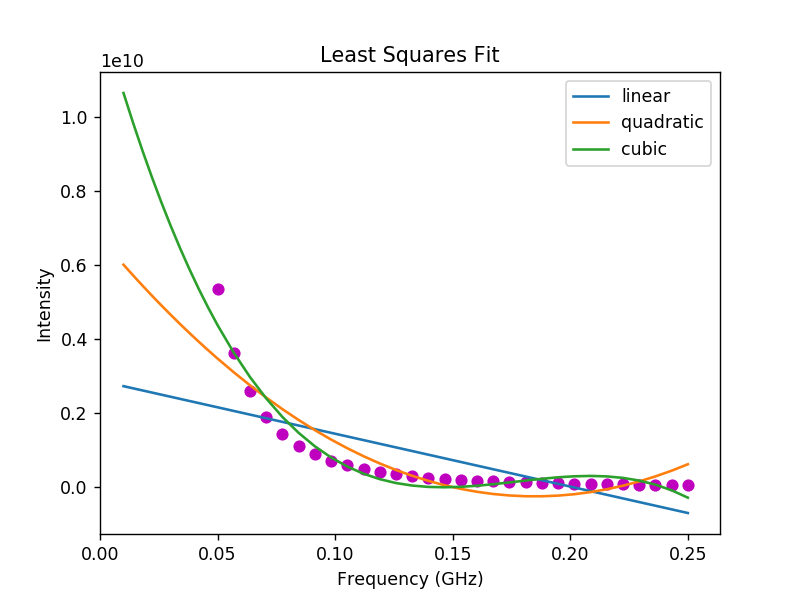

<IPython.core.display.Javascript object>


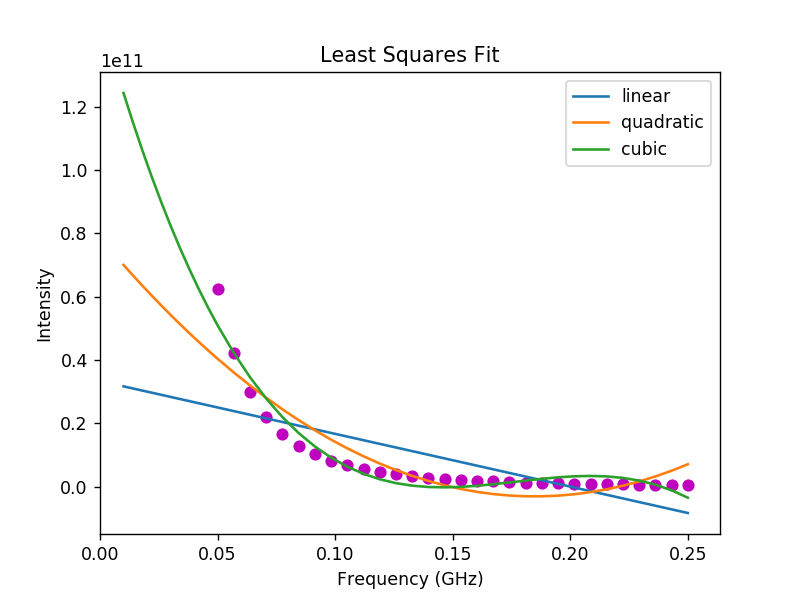

<IPython.core.display.Javascript object>


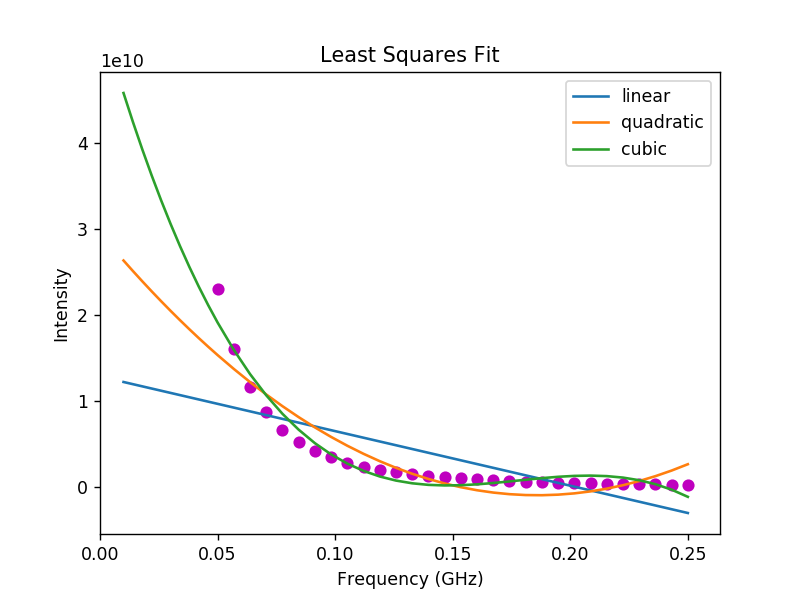

<IPython.core.display.Javascript object>


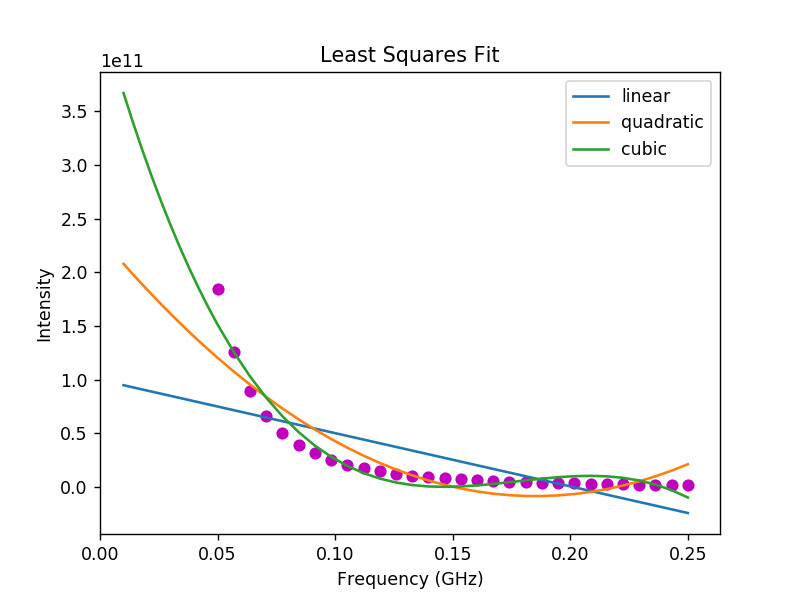

<IPython.core.display.Javascript object>


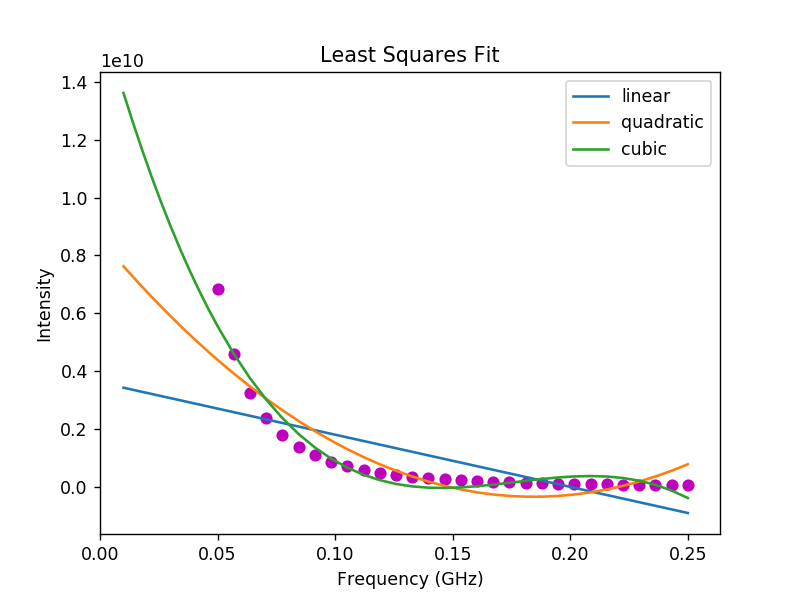

In [5]:
for i in np.arange(intensity_arr.shape[0]): #looping through 9 rows of ypoints_arr
    lin_fit, lin_param, lin_error =ls.ymodel_extend(lin_matrix,intensity_arr[i],10)
    quad_fit, quad_param, quad_error = ls.ymodel_extend(quad_matrix,intensity_arr[i],10)
    cub_fit, cub_param, cub_error = ls.ymodel_extend(cub_matrix,intensity_arr[i],10)
    plt.figure()
    plt.plot(freq_arr, lin_fit, label='linear')
    plt.plot(freq_arr, quad_fit, label='quadratic')
    plt.plot(freq_arr, cub_fit, label='cubic')
    plt.scatter(freq,intensity_arr[i], color='m')
    plt.legend(loc='upper right')
    plt.title("Least Squares Fit")
    plt.xlabel(freq.name)
    plt.ylabel('Intensity')
    plt.xlim(left=0)
    plt.show()

In [6]:
# freq_log= np.log(freq_arr) #finding log of extended x points 

# for j in np.arange(intensity_arr.shape[0]):
#     intensity_log = np.log(intensity_arr[i]) #log of y points
#     pow_fit, pow_param, pow_error = ls.ymodel_extend(pow_matrix,intensity_log,10)
#     plt.figure()
#     plt.plot(freq_log, pow_fit, label='power')
#     plt.scatter(np.log(freq),intensity_log, color='m')
#     plt.title("Least Squares Fit for Power Law (log-log)")
#     plt.xlabel(freq.name)
#     plt.ylabel('Intensity')
#     plt.show()

<IPython.core.display.Javascript object>


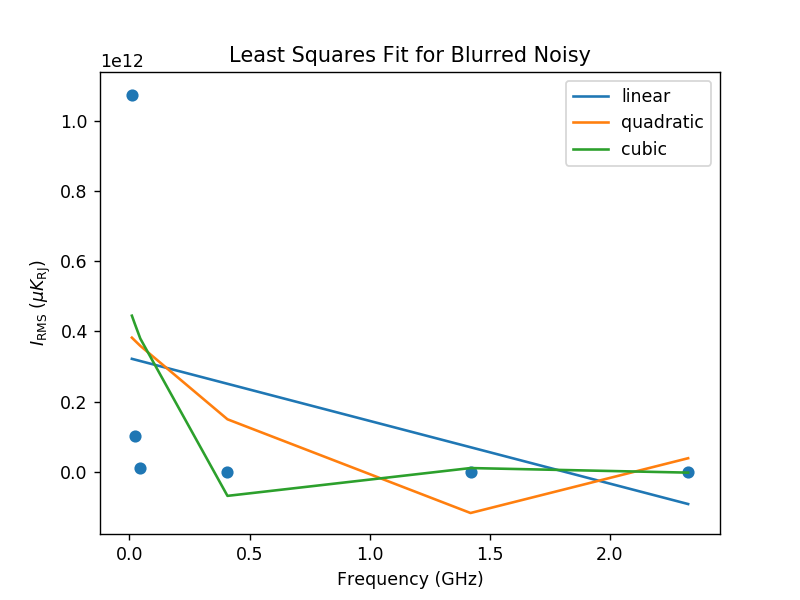

<IPython.core.display.Javascript object>


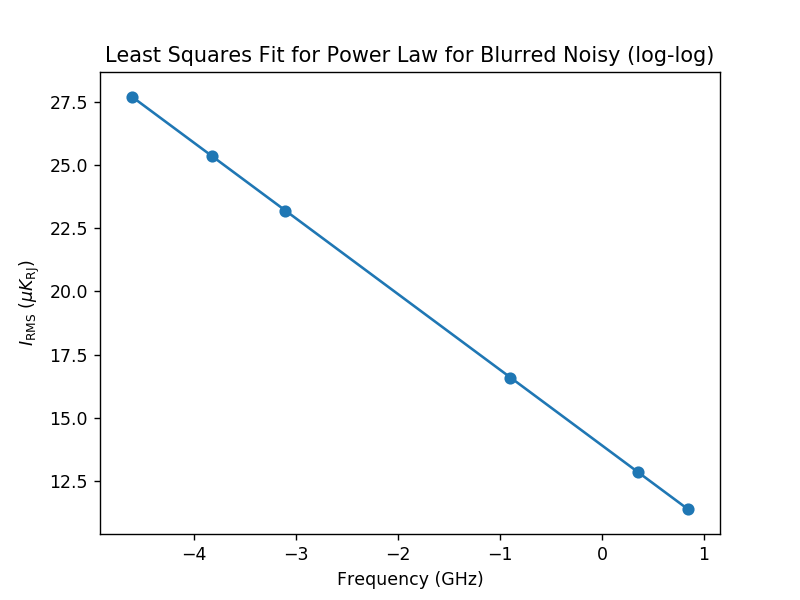

<IPython.core.display.Javascript object>


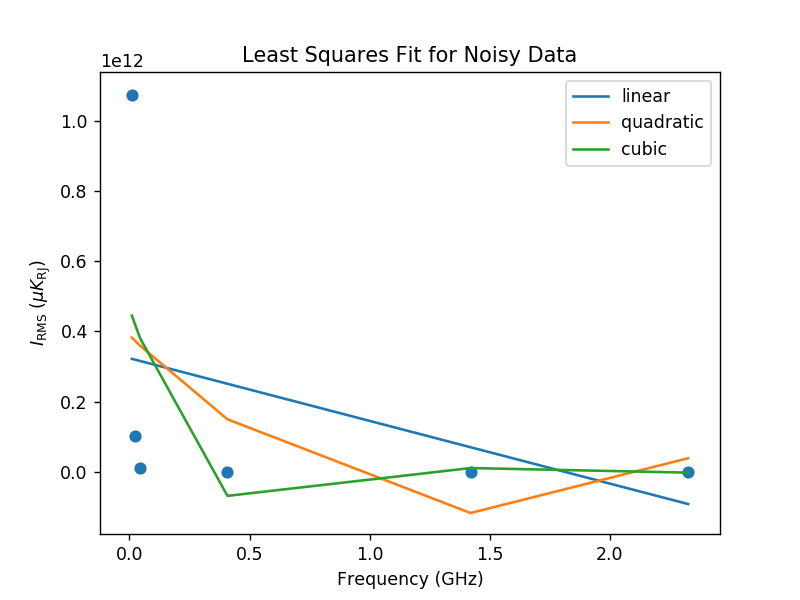

<IPython.core.display.Javascript object>


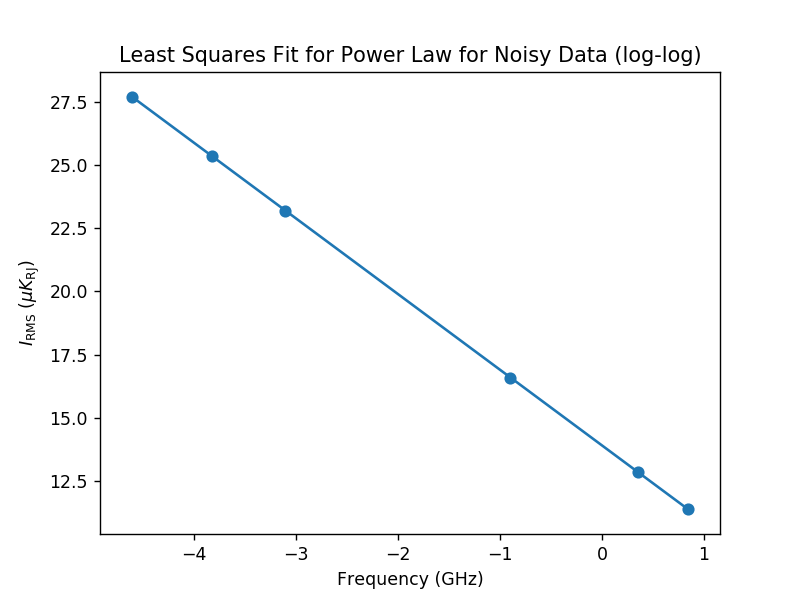

<IPython.core.display.Javascript object>


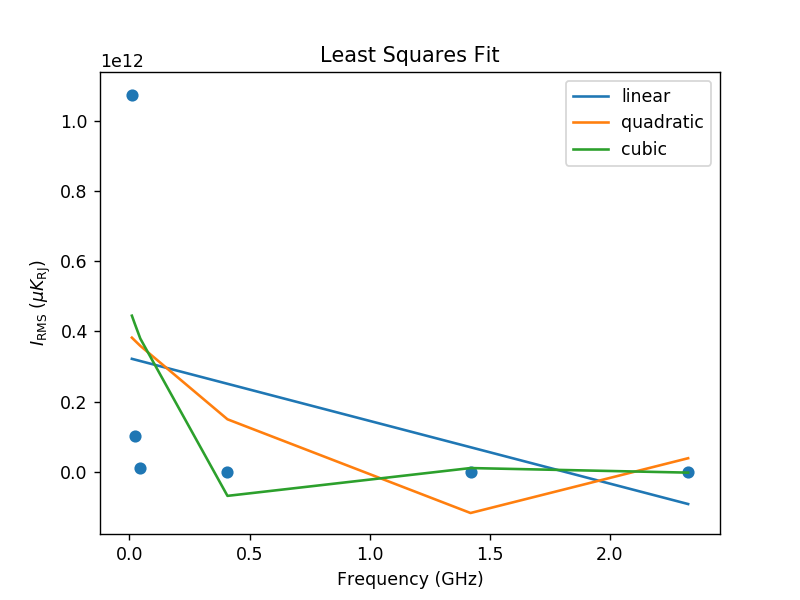

<IPython.core.display.Javascript object>


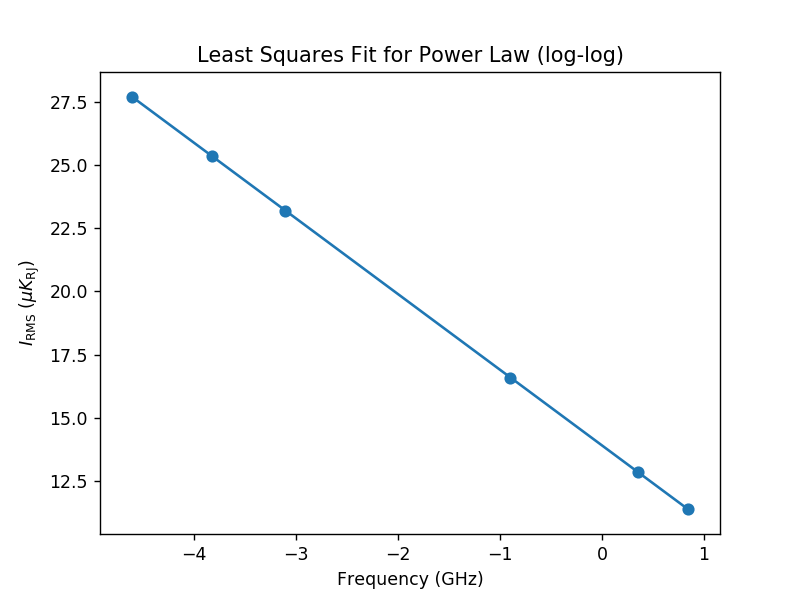

In [8]:
pixel = 130000
#fits for overlapping pixels
lin_fit2, lin_param2, lin_error2 =ls.ymodel(lin_matrix2,intensity_arr2[pixel])
quad_fit2, quad_param2, quad_error2 = ls.ymodel(quad_matrix2,intensity_arr2[pixel])
cub_fit2, cub_param2, cub_error2 = ls.ymodel(cub_matrix2,intensity_arr2[pixel])
pow_fit2, pow_param2, pow_error2 = ls.ymodel(pow_matrix2,np.log(intensity_arr2[pixel]))
#fits for noisy data
lin_fit_noisy, lin_param_noisy, lin_error_noisy =ls.ymodel(lin_matrix2,intensity_noisy[pixel])
quad_fit_noisy, quad_param_noisy, quad_error_noisy =ls.ymodel(quad_matrix2,intensity_noisy[pixel])
cub_fit_noisy, cub_param_noisy, cub_error_noisy =ls.ymodel(cub_matrix2,intensity_noisy[pixel])
pow_fit_noisy, pow_param_noisy, pow_error_noisy =ls.ymodel(pow_matrix2,np.log(intensity_noisy[pixel]))
#fits for blurred noisy data
lin_fit_blurnois, lin_param_blurnois, lin_error_blurnois =ls.ymodel(lin_matrix2,int_blurnois[pixel])
quad_fit_blurnois,quad_param_blurnois, quad_error_blurnois =ls.ymodel(quad_matrix2,int_blurnois[pixel])
cub_fit_blurnois, cub_param_blurnois, cub_error_blurnois =ls.ymodel(cub_matrix2,int_blurnois[pixel])
pow_fit_blurnois, pow_param_blurnois, pow_error_blurnois =ls.ymodel(pow_matrix2,np.log(int_blurnois[pixel]))

plt.figure()
plt.plot(freq2_arr, lin_fit_blurnois, label='linear')
plt.plot(freq2_arr, quad_fit_blurnois, label='quadratic')
plt.plot(freq2_arr, cub_fit_blurnois, label='cubic')
plt.scatter(freq2,int_blurnois[pixel])
# plt.yscale('log')
plt.legend(loc='upper right')
plt.title("Least Squares Fit for Blurred Noisy")
plt.xlabel('Frequency (GHz)')
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)")
plt.show()
# plt.savefig('lsfit')

plt.figure()
plt.plot(np.log(freq2_arr), pow_fit_blurnois, label='power')
plt.scatter(np.log(freq2),np.log(int_blurnois[pixel]))
plt.title("Least Squares Fit for Power Law for Blurred Noisy (log-log)")
plt.xlabel('Frequency (GHz)')
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)")
plt.show()

plt.figure()
plt.plot(freq2_arr, lin_fit_noisy, label='linear')
plt.plot(freq2_arr, quad_fit_noisy, label='quadratic')
plt.plot(freq2_arr, cub_fit_noisy, label='cubic')
plt.scatter(freq2,intensity_noisy[pixel])
# plt.yscale('log')
plt.legend(loc='upper right')
plt.title("Least Squares Fit for Noisy Data")
plt.xlabel('Frequency (GHz)')
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)")
plt.show()
# plt.savefig('lsfit')

plt.figure()
plt.plot(np.log(freq2_arr), pow_fit_noisy, label='power')
plt.scatter(np.log(freq2),np.log(intensity_noisy[pixel]))
plt.title("Least Squares Fit for Power Law for Noisy Data (log-log)")
plt.xlabel('Frequency (GHz)')
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)")
plt.show()

plt.figure()
plt.plot(freq2_arr, lin_fit2, label='linear')
plt.plot(freq2_arr, quad_fit2, label='quadratic')
plt.plot(freq2_arr, cub_fit2, label='cubic')
plt.scatter(freq2,intensity_arr2[pixel])
# plt.yscale('log')
plt.legend(loc='upper right')
plt.title("Least Squares Fit")
plt.xlabel('Frequency (GHz)')
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)")
plt.show()
# plt.savefig('lsfit')

plt.figure()
plt.plot(np.log(freq2_arr), pow_fit2, label='power')
plt.scatter(np.log(freq2),np.log(intensity_arr2[pixel]))
plt.title("Least Squares Fit for Power Law (log-log)")
plt.xlabel('Frequency (GHz)')
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)")
plt.show()
# plt.savefig('lsfit_pow')

## Errors for Parameters

This is the error for parameters of the linear fit. The parameters are $b$ for intercept and $m$ for slope from the equation $y=mx+b$.

In [ ]:
error_cov_lin = ls.error_bar(lin_error)
print('Error covariance for linear fit is\n', error_cov_lin)
print('\nThe slope (m) is', lin_param[1],'+/-', error_cov_lin[1], '(',lin_param[1]+error_cov_lin[1],',',
      lin_param[1]-error_cov_lin[1],')')
print('The intercept (b) is', lin_param[0],'+/-', error_cov_lin[0],'(',lin_param[0]+error_cov_lin[0],',',
      lin_param[0]-error_cov_lin[0],')')

This is the error for the parameter of the power law fit. The parameters are $log(\beta)$ and $\alpha$ for the equation $y^{'} = log(\beta) + \alpha x^{'}$. Note that $y^{'}=log(y)$ and $x^{'}=log(x)$ and that it's for a log-log graph (NEEDS WORK).

In [ ]:
print('Error covariance for power law fit is \n', error_cov(xmatrix_pow))
print('\nLog(beta) is', pow_param[1],'+/-', error_bar(xmatrix_pow)[1], '(',pow_param[1]+error_bar(xmatrix_pow)[1],',',
      pow_param[1]-error_bar(xmatrix_pow)[1],')')
print('Alpha is', pow_param[0],'+/-', error_bar(xmatrix_pow)[0],'(',pow_param[0]+error_bar(xmatrix_pow)[0],',',
      pow_param[0]-error_bar(xmatrix_pow)[0],')')